In [31]:
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
import ipywidgets as widgets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Agrandir les figures
plt.rcParams['figure.figsize'] = (15.0, 8.0)   
plt.rcParams['font.family'] = "serif"

In [32]:
# Création du widget de table interactive
def create_dataframe_widget(df):
    table = widgets.Output()
    table.append_display_data(df)
    return table

In [33]:
#Importer les données financières de Facebook
META = yf.download("META", start="2010-01-01", end="2023-04-07")
print(META)



[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-05-18   42.049999   45.000000   38.000000   38.230000   38.230000   
2012-05-21   36.529999   36.660000   33.000000   34.029999   34.029999   
2012-05-22   32.610001   33.590000   30.940001   31.000000   31.000000   
2012-05-23   31.370001   32.500000   31.360001   32.000000   32.000000   
2012-05-24   32.950001   33.209999   31.770000   33.029999   33.029999   
...                ...         ...         ...         ...         ...   
2023-03-31  207.240005  212.169998  206.770004  211.940002  211.940002   
2023-04-03  208.839996  213.490005  208.199997  213.070007  213.070007   
2023-04-04  213.389999  216.240005  212.539993  214.720001  214.720001   
2023-04-05  214.149994  215.190002  209.940002  211.479996  211.479996   
2023-04-06  209.250000  216.940002  208.649

Working with time series data

In [34]:
META.index 

DatetimeIndex(['2012-05-18', '2012-05-21', '2012-05-22', '2012-05-23',
               '2012-05-24', '2012-05-25', '2012-05-29', '2012-05-30',
               '2012-05-31', '2012-06-01',
               ...
               '2023-03-24', '2023-03-27', '2023-03-28', '2023-03-29',
               '2023-03-30', '2023-03-31', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06'],
              dtype='datetime64[ns]', name='Date', length=2739, freq=None)

In [35]:
META.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [36]:
META.Open

Date
2012-05-18     42.049999
2012-05-21     36.529999
2012-05-22     32.610001
2012-05-23     31.370001
2012-05-24     32.950001
                 ...    
2023-03-31    207.240005
2023-04-03    208.839996
2023-04-04    213.389999
2023-04-05    214.149994
2023-04-06    209.250000
Name: Open, Length: 2739, dtype: float64

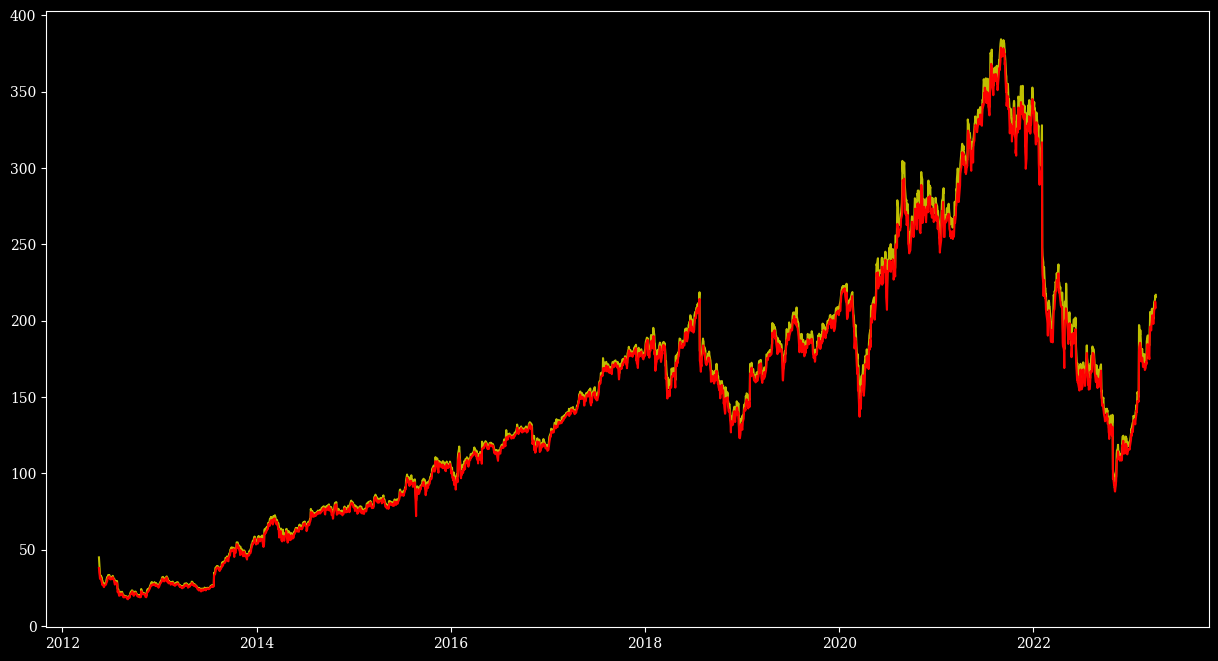

In [37]:
plt.plot(META.index, META.High, color ='y')
plt.plot(META.index, META.Low, color ='r')

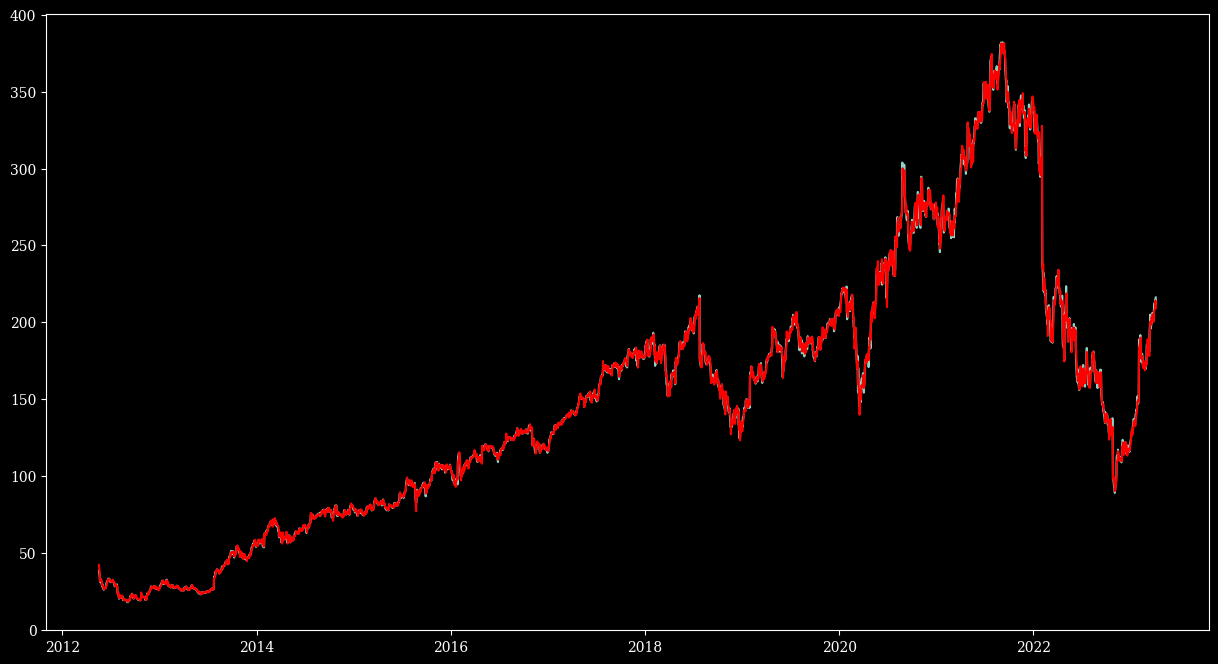

In [38]:
plt.plot(META.index, META.Close)
plt.plot(META.index, META.Open, color ='r')

In [39]:
#Sélectionner un échantillon aléatoire de 10 lignes 
sample = META. sample (10)
sample

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-25,86.949997,87.669998,83.000000,83.000000,83.000000,52021200
2015-03-10,78.500000,79.260002,77.550003,77.550003,77.550003,23067100
2014-03-13,71.290001,71.349998,68.150002,68.830002,68.830002,57091000
2021-09-20,359.299988,361.029999,349.799988,355.700012,355.700012,19822800
2013-01-18,30.309999,30.440001,29.270000,29.660000,29.660000,49631500
2018-10-04,161.460007,161.460007,157.350006,158.850006,158.850006,25739600
2014-07-24,75.959999,76.739998,74.510002,74.980003,74.980003,124168000
2014-11-24,73.540001,74.349998,73.349998,74.010002,74.010002,22103800
2013-08-29,40.889999,41.779999,40.799999,41.279999,41.279999,58303400


In [40]:
# Echantillon aléatoire pris d'un mois
monthly_sample = META. resample('M')

Text(0, 0.5, 'Différence')

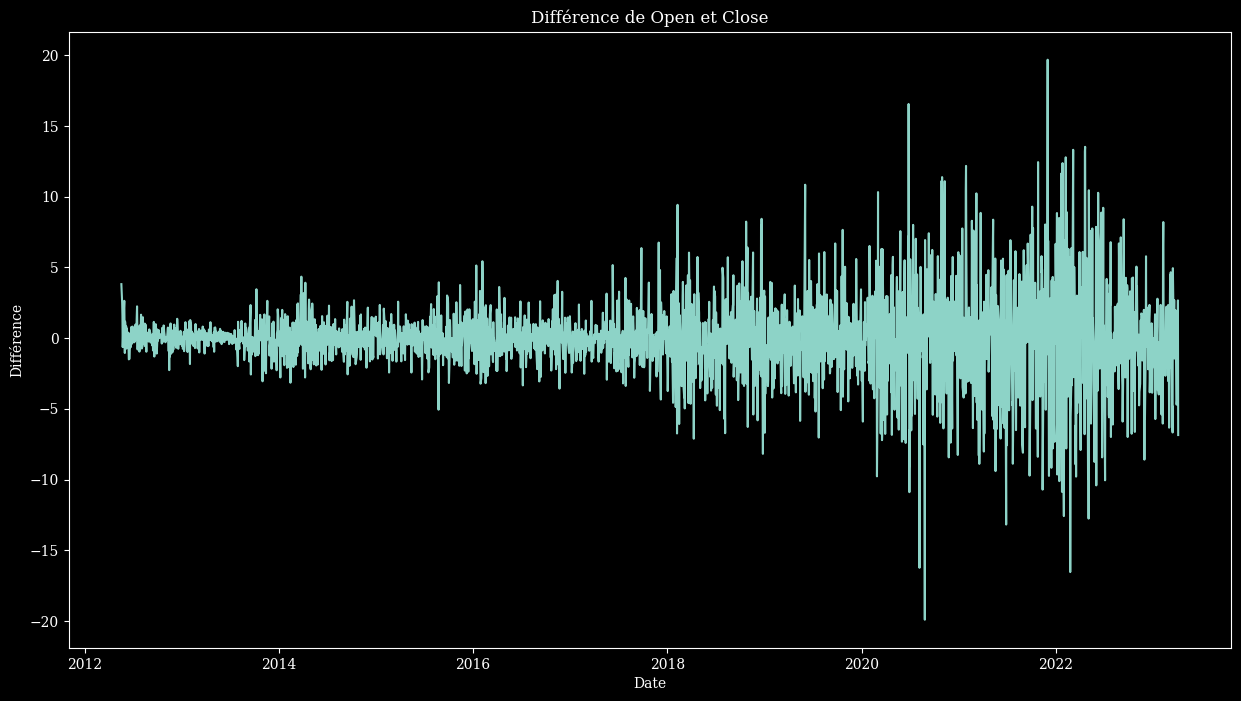

In [41]:
# Ajouter la colonne Diff et la plot
META ['Diff'] = META.Open - META.Close
plt.plot(META.index , META.Diff)
plt.title ('Différence de Open et Close')
plt.xlabel ('Date')
plt.ylabel ('Différence')

Analyse financière commune

Returns et Log-returns

Text(0, 0.5, 'Daily return')

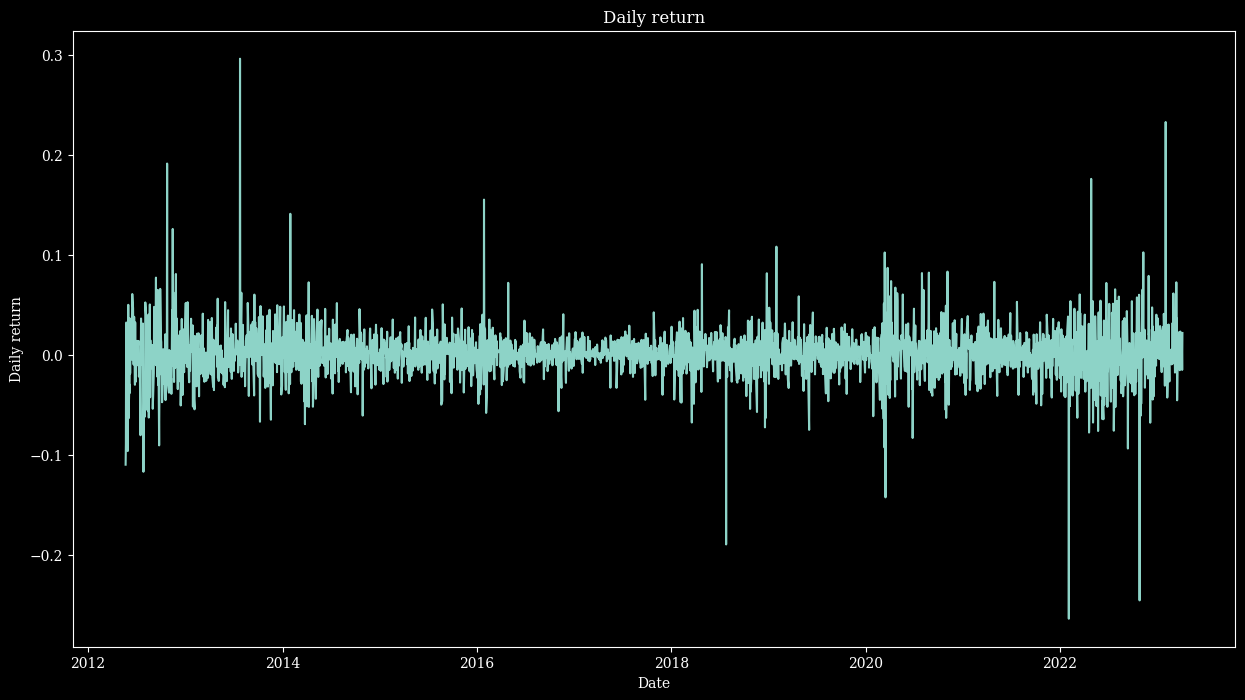

In [42]:
# Nommer la database Adj close indexée par la date
daily_close = META[['Adj Close']]

# Daily returns 
daily_return = daily_close.pct_change()
# print(daily_return)
plt.plot(daily_return.index , daily_return[['Adj Close']])
plt.title ('Daily return')
plt.xlabel('Date')
plt.ylabel('Daily return')



Text(0, 0.5, 'Daily log-return')

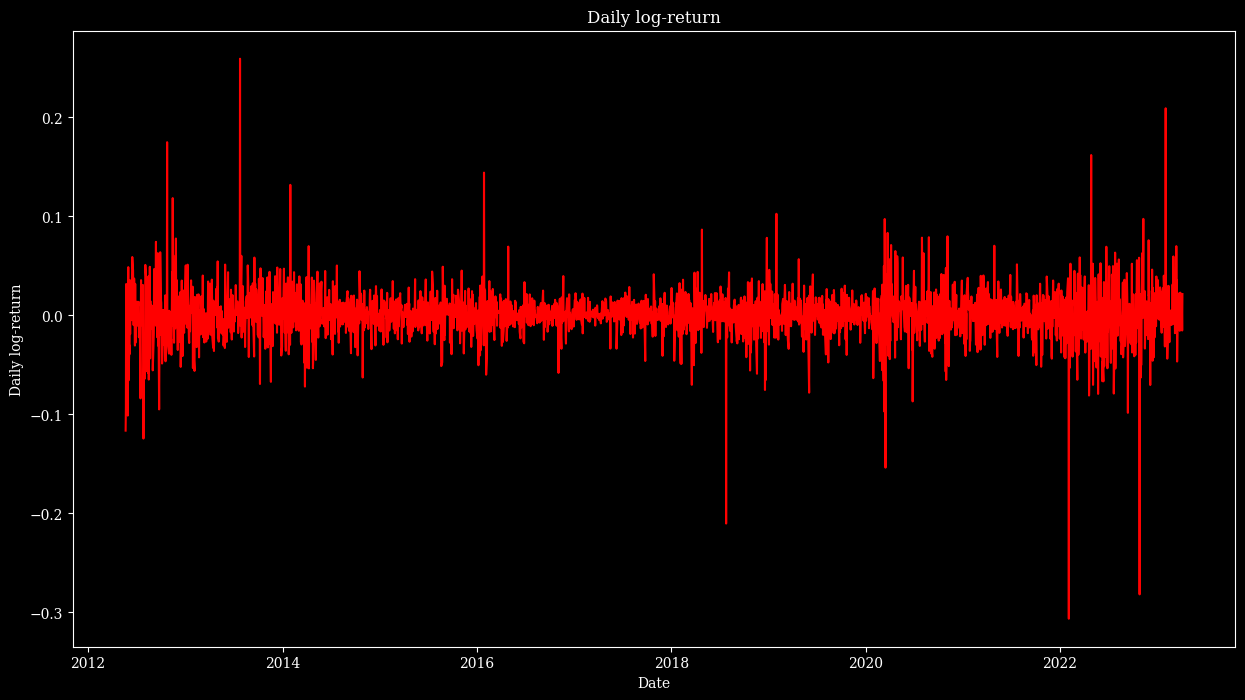

In [43]:
# Daily log returns
daily_log_return= np.log( 1 + daily_close.pct_change())
plt.plot (daily_log_return.index, daily_log_return[['Adj Close']], color = 'r')
plt.title('Daily log-return')
plt.xlabel('Date')
plt.ylabel('Daily log-return')


# On voit qu'on peut approximer le log-return au return vu que ce dernier est proche de 0

In [44]:
# Resample 'META' to business months, take last observation on as value
monthly = META.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
#monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = META.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()



,Open,High,Low,Close,Adj Close,Volume,Diff
Date,,,,,,,
2012-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-30,-0.246077,-0.250622,-0.217330,-0.222567,-0.222567,-0.709036,-0.900132
2013-01-31,0.011574,0.012210,0.018130,0.017869,0.017869,0.636611,-1.351742
2013-05-31,0.071492,0.063949,0.072420,0.065502,0.065502,-0.380394,-3.682641
2013-09-30,0.258390,0.261897,0.262617,0.267335,0.267335,0.495574,-1.968243
2014-01-31,0.528574,0.529675,0.522004,0.523071,0.523071,0.189119,-1.264507
2014-05-31,0.221491,0.219574,0.218176,0.218744,0.218744,-0.102445,5.373857
2014-09-30,0.121851,0.117551,0.133453,0.127184,0.127184,-0.424533,-1.791128
2015-01-31,0.076418,0.075976,0.074151,0.073769,0.073769,-0.161247,-1.277529


Date
2012-05-18         NaN
2012-05-21   -5.200001
2012-05-22   -4.029999
2012-05-23    0.000000
2012-05-24    0.029999
                ...   
2023-03-31    3.100006
2023-04-03    0.130005
2023-04-04    0.649994
2023-04-05   -4.240005
2023-04-06    3.620010
Name: Close, Length: 2739, dtype: float64


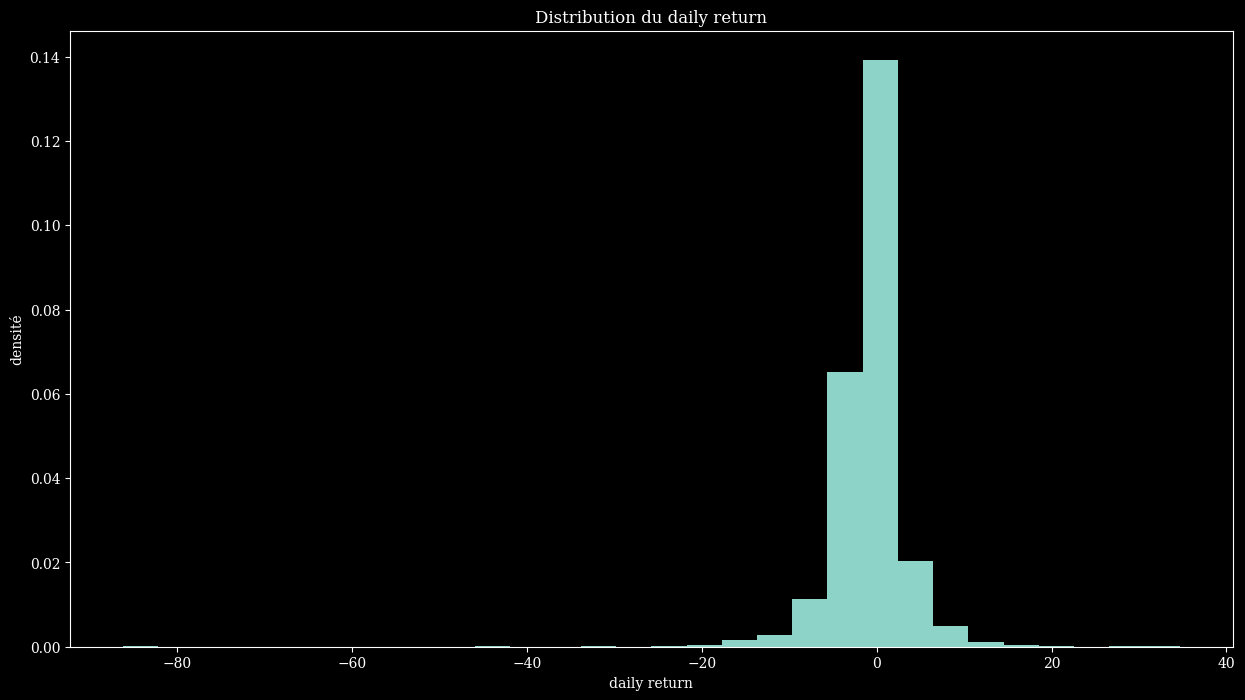

In [45]:
# plot le daily_return

daily_pct_c = META.Close - META.Close.shift(1) - 1
print(daily_pct_c)
# plt.plot(META.index , daily_pct_c)

plt.hist(daily_pct_c, bins = 30 , density = True)
plt.title ('Distribution du daily return')
plt.xlabel ('daily return')
plt.ylabel ('densité')
plt.show()


On remarque que le daily return est plutôt concentré en 0, ce qui est normale vu que l'action META est plutôt stable.

In [46]:
daily_pct_c.describe ()

count    2738.000000
mean       -0.935037
std         4.207295
min       -86.240005
25%        -2.100000
50%        -0.919998
75%         0.450003
max        34.650009
Name: Close, dtype: float64

In [47]:
# Cumulative daily return des 100 derniers lignes de la database META

new_META = META.tail(100)
new_daily_pct_c = new_META.Close - new_META.Close.shift(1) - 1

product = 1
for i in range(1,100):
    product = product * new_daily_pct_c [i]
print("Cumulative daily return is " + str(product))   

Cumulative daily return is 1.4916354267807968e+29


Volatilité

In [48]:
# Calculer les rendements log-arithmiques
log_returns = np.log(META['Adj Close'] / META['Adj Close'].shift(1))

# Calculer la volatilité annuelle en pourcentage
volatility = np.sqrt(252) * log_returns.std() * 100
print(volatility)

40.769160201565334


Une volatilité annuelle de 40% signifie que l'écart-type des rendements de l'action est de 40% par an. Cela indique que l'action a une variation importante dans ses rendements, ce qui peut être considéré comme une mesure du risque. Plus précisément, cela signifie qu'on peut s'attendre à ce que les rendements de l'action varient autour de sa moyenne annuelle d'environ 40% avec une certaine probabilité.

Régression linéaire

In [49]:
# Création de la nouvelle base de données
META['Daily_return'] = daily_return
META = META.dropna()
META_tronquée = META.iloc[-10:]
print(META_tronquée)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-03-24  205.179993  207.580002  203.550003  206.009995  206.009995   
2023-03-27  204.809998  205.860001  201.360001  202.839996  202.839996   
2023-03-28  200.149994  201.029999  197.899994  200.679993  200.679993   
2023-03-29  203.559998  205.720001  202.539993  205.350006  205.350006   
2023-03-30  203.380005  208.089996  202.820007  207.839996  207.839996   
2023-03-31  207.240005  212.169998  206.770004  211.940002  211.940002   
2023-04-03  208.839996  213.490005  208.199997  213.070007  213.070007   
2023-04-04  213.389999  216.240005  212.539993  214.720001  214.720001   
2023-04-05  214.149994  215.190002  209.940002  211.479996  211.479996   
2023-04-06  209.250000  216.940002  208.649994  216.100006  216.100006   

              Volume      Diff  Daily_return  
Date                                          
2023-03-24  27716

In [50]:
# Sélection des variables explicatives et de la variable cible
X = META_tronquée[['Daily_return']]
y = META_tronquée['Close']

# Création de l'objet de modèle de régression linéaire
reg = LinearRegression()

# Ajustement du modèle aux données d'entraînement
reg.fit(X, y)

# Prédiction des prix pour la semaine suivante (chaque jour)
daily_returns = np.array([0.01, -0.02, 0.03, 0.01, 0.005, -0.01, -0.02]) # exemple de valeurs de retour journalier pour chaque jour de la semaine suivante
meta_price_predictions = reg.predict(daily_returns.reshape(-1, 1))

# Affichage des prédictions de prix pour chaque jour de la semaine suivante
for i in range(len(meta_price_predictions)):
    print('La prédiction du prix de l\'action META pour le jour', i+1, 'de la semaine suivante est de:', round(meta_price_predictions[i], 2), 'USD')





La prédiction du prix de l'action META pour le jour 1 de la semaine suivante est de: 209.66 USD
La prédiction du prix de l'action META pour le jour 2 de la semaine suivante est de: 205.06 USD
La prédiction du prix de l'action META pour le jour 3 de la semaine suivante est de: 212.72 USD
La prédiction du prix de l'action META pour le jour 4 de la semaine suivante est de: 209.66 USD
La prédiction du prix de l'action META pour le jour 5 de la semaine suivante est de: 208.89 USD
La prédiction du prix de l'action META pour le jour 6 de la semaine suivante est de: 206.59 USD
La prédiction du prix de l'action META pour le jour 7 de la semaine suivante est de: 205.06 USD


c:\Users\ayman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Le code ajuste ensuite ce modèle aux données d'entraînement et prédit les prix de l'action pour chaque jour de la semaine suivante en utilisant les valeurs de retour journalier fournies dans la variable 'daily_returns'. Enfin, le code affiche les prédictions de prix pour chaque jour de la semaine suivante en utilisant une boucle 'for' et la fonction 'print'.

In [51]:
# Prédiction des prix pour la semaine suivante
daily_return_prediction = np.mean(X.values)
meta_price_prediction = reg.predict([[daily_return_prediction]])

# Calcul de la MSE et R-squared
y_pred = reg.predict(X)
mse = mean_squared_error(y, y_pred)
r_squared = r2_score(y, y_pred)

# Affichage des résultats
print('La MSE est de :', round(mse,2))
print('Le R-squared est de :', round(r_squared,2))


La MSE est de : 19.93
Le R-squared est de : 0.19


c:\Users\ayman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Interprétation des valeurs :

La MSE (Mean Squared Error) de 19.93 indique que le modèle de régression linéaire a en moyenne une erreur quadratique de 19.93 dans ses prédictions de prix de l'action META par rapport aux valeurs réelles. Cela signifie que les prédictions du modèle peuvent être assez éloignées des valeurs réelles.

Le R-squared de 0.19 indique que seulement 19% de la variation de la variable cible (le prix de l'action META) peut être expliquée par la variation de la variable explicative (le rendement quotidien). Cela suggère que le modèle n'est pas très précis pour prédire les prix de l'action META en utilisant uniquement le rendement quotidien comme variable explicative, car il y a probablement d'autres facteurs importants qui influencent le prix de l'action mais qui ne sont pas pris en compte dans le modèle. Par conséquent, il peut être nécessaire de trouver de nouvelles variables explicatives ou d'utiliser d'autres techniques de modélisation pour améliorer les performances du modèle.

Des pistes pour améliorer la prédiction : 

La prédiction des prix de l'action META avec une régression linéaire peut être améliorée en utilisant différentes techniques et approches. Voici quelques pistes possibles pour améliorer la prédiction :

- Utiliser des variables explicatives pertinentes : Pour améliorer la précision de la régression linéaire, il est important d'utiliser des variables explicatives pertinentes pour la prédiction des prix de l'action META. Les variables pertinentes peuvent inclure les données financières de l'entreprise, comme les bénéfices, les flux de trésorerie, les ventes, les ratios financiers, etc.

- Normaliser les données : Il est important de normaliser les données pour éviter les écarts de mesure et de mise à l'échelle, qui peuvent fausser les résultats de la régression linéaire.

- Utiliser une régression linéaire multi-variée : Pour améliorer la précision de la prédiction des prix de l'action META, il peut être utile d'utiliser une régression linéaire multi-variée. Cela signifie que plusieurs variables explicatives sont utilisées pour prédire les prix de l'action META.

- Utiliser une analyse en composantes principales : Une autre approche pour améliorer la prédiction des prix de l'action META consiste à utiliser une analyse en composantes principales (PCA) pour réduire la dimensionnalité des données. Cela permet d'éliminer les variables redondantes et de se concentrer sur les variables les plus importantes pour la prédiction.

- Utiliser une régression linéaire avec régularisation : Pour éviter le sur-ajustement, qui peut réduire la précision de la prédiction, il peut être utile d'utiliser une régression linéaire avec régularisation, comme la régression ridge ou la régression Lasso. Ces méthodes peuvent aider à réduire la variance et à améliorer la précision de la prédiction.

- Diviser les données en ensembles d'entraînement et de test : Pour évaluer la précision de la prédiction, il est important de diviser les données en ensembles d'entraînement et de test. Cela permet d'évaluer la précision du modèle en utilisant des données nouvelles et indépendantes de celles utilisées pour l'entraînement.

- Optimiser les hyperparamètres : Les hyperparamètres du modèle, comme le paramètre de régularisation, peuvent avoir un impact important sur la précision de la prédiction. Il est important d'optimiser ces paramètres pour maximiser la précision de la prédiction. Cela peut être réalisé en utilisant des méthodes d'optimisation telles que la validation croisée.

En utilisant ces pistes pour améliorer la prédiction des prix de l'action META avec une régression linéaire, il est possible d'obtenir des prévisions plus précises et fiables.

II. Machine Learning for finance

L'objectif de cette partie est de prédire le prix de l'action META, pour cela on va suivre la pipeline en ML


1. Train/Test split

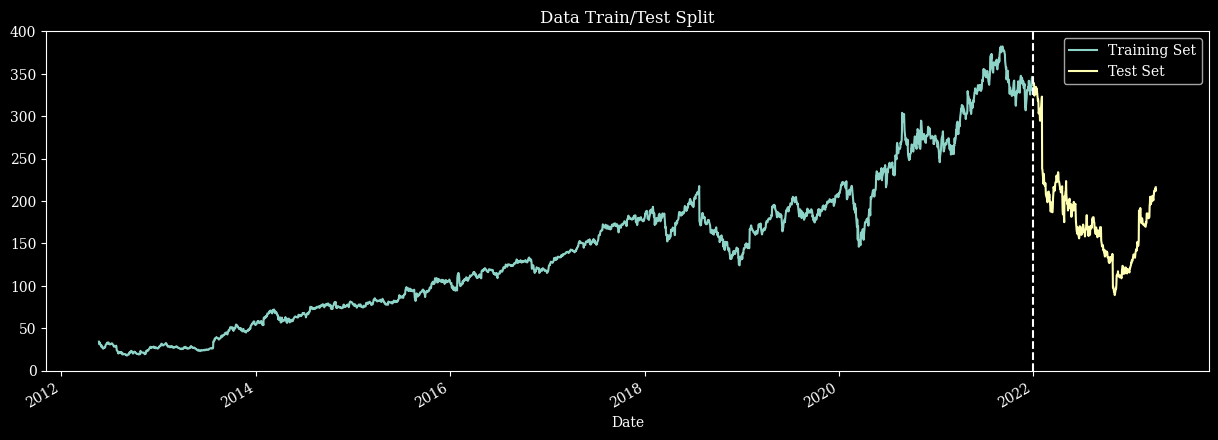

In [52]:
train = META['Close'].loc[META.index < '2022-01-01']
test = META['Close'].loc[META.index > '2022-01-01']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2022-01-01', color='white', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

Visualisation d'un mois de la variation de META :

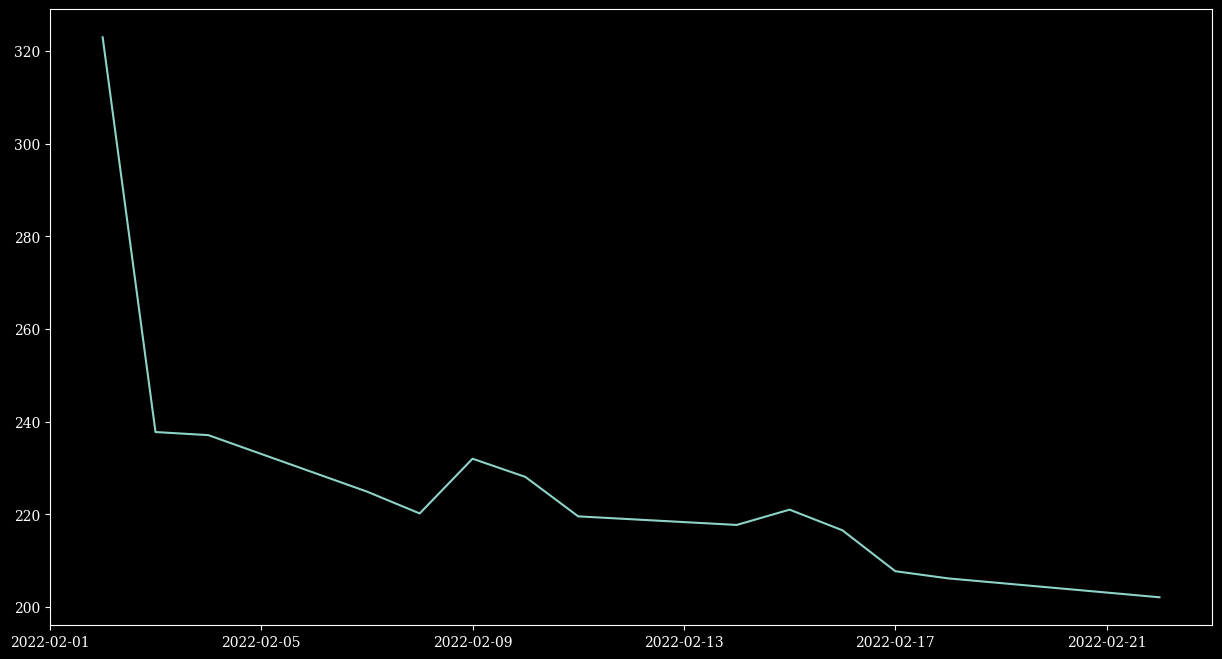

In [53]:
a = META['Close'].loc[('2022-02-01'< META.index) &(META.index < '2022-02-23' )]
plt.plot(a)
plt.show()

2. Features

In [57]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(META)
display(df)


,Open,High,Low,Close,Adj Close,Volume,Diff,Daily_return,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,,
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,2.500000,-0.109861,0,0,2,5,2012,142,21,21
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,1.610001,-0.089039,0,1,2,5,2012,143,22,21
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,-0.629999,0.032258,0,2,2,5,2012,144,23,21
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,-0.079998,0.032187,0,3,2,5,2012,145,24,21
2012-05-25,32.900002,32.950001,31.110001,31.910000,31.910000,37149800,0.990002,-0.033909,0,4,2,5,2012,146,25,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,207.240005,212.169998,206.770004,211.940002,211.940002,25440300,-4.699997,0.019727,0,4,1,3,2023,90,31,13
2023-04-03,208.839996,213.490005,208.199997,213.070007,213.070007,17924600,-4.230011,0.005332,0,0,2,4,2023,93,3,14
2023-04-04,213.389999,216.240005,212.539993,214.720001,214.720001,21026400,-1.330002,0.007744,0,1,2,4,2023,94,4,14
